<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
import taiko as tk
from taiko.model import *
from taiko.play import *
from taiko.performance import *

import lightgbm as lgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath

sns.set(font_scale=1.5)

Using TensorFlow backend.


In [3]:
lgbm = LGBM()

100%|██████████| 12/12 [00:00<00:00, 92.79it/s]

aaaaa
carolyn
cuxi
fatfat
eve
oliver
chris
sheep
howeverover
celiven
john
kdchang


In [3]:
lgbm.pre_train()

100%|██████████| 12/12 [00:00<00:00, 81.53it/s]


aaaaa
carolyn
cuxi
fatfat
eve
oliver
chris
sheep
howeverover
celiven
john
kdchang
Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.78888
[10]	valid_0's f1-score: 0.828298
[15]	valid_0's f1-score: 0.848391
[20]	valid_0's f1-score: 0.864515
[25]	valid_0's f1-score: 0.878113
[30]	valid_0's f1-score: 0.894623
[35]	valid_0's f1-score: 0.905515
[40]	valid_0's f1-score: 0.914798
[45]	valid_0's f1-score: 0.917913
[50]	valid_0's f1-score: 0.9221
[55]	valid_0's f1-score: 0.92594
[60]	valid_0's f1-score: 0.931256
[65]	valid_0's f1-score: 0.934974
[70]	valid_0's f1-score: 0.937112
[75]	valid_0's f1-score: 0.940329
[80]	valid_0's f1-score: 0.939591
[85]	valid_0's f1-score: 0.941949
[90]	valid_0's f1-score: 0.943724
[95]	valid_0's f1-score: 0.946338
[100]	valid_0's f1-score: 0.947512
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       284
          1       0.95      0.96      0.96       931
          2       0

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.817656
[10]	valid_0's f1-score: 0.840886
[15]	valid_0's f1-score: 0.861442
[20]	valid_0's f1-score: 0.875243
[25]	valid_0's f1-score: 0.885697
[30]	valid_0's f1-score: 0.895006
[35]	valid_0's f1-score: 0.906675
[40]	valid_0's f1-score: 0.915569
[45]	valid_0's f1-score: 0.919991
[50]	valid_0's f1-score: 0.924721
[55]	valid_0's f1-score: 0.930064
[60]	valid_0's f1-score: 0.931483
[65]	valid_0's f1-score: 0.935675
[70]	valid_0's f1-score: 0.940175
[75]	valid_0's f1-score: 0.941511
[80]	valid_0's f1-score: 0.944379
[85]	valid_0's f1-score: 0.946054
[90]	valid_0's f1-score: 0.947911
[95]	valid_0's f1-score: 0.948079
[100]	valid_0's f1-score: 0.948122
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       283
          1       0.95      0.96      0.96       932
          2       0.97      0.95      0.96       935
          3       0.90      0.90      0.90  

In [4]:
record_files = glob('../data/alpha/*/*/record_table.csv')
record_dfs = []
for record_file_path in record_files:
    record_df = pd.read_csv(record_file_path)
    record_dfs.append(record_df)
record_df = pd.concat(record_dfs, ignore_index=True)

record_df = record_df[(record_df['song_id'] >= 1) & (record_df['song_id'] <= 4)]
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
1,aaaaa,1,L_2018-09-28_111304.csv,R_2018-09-28_111305.csv,capture_2018_09_28_11_13_05
2,aaaaa,2,L_2018-09-28_111610.csv,R_2018-09-28_111611.csv,capture_2018_09_28_11_16_11
3,aaaaa,3,L_2018-09-28_111936.csv,R_2018-09-28_111937.csv,capture_2018_09_28_11_19_37
4,aaaaa,4,L_2018-09-28_112353.csv,R_2018-09-28_112355.csv,capture_2018_09_28_11_23_55
5,aaaaa,1,L_2018-09-28_112912.csv,R_2018-09-28_112913.csv,capture_2018_09_28_11_29_13
6,aaaaa,2,L_2018-09-28_113242.csv,R_2018-09-28_113244.csv,capture_2018_09_28_11_32_44
7,aaaaa,3,L_2018-09-28_113531.csv,R_2018-09-28_113532.csv,capture_2018_09_28_11_35_32
8,aaaaa,4,L_2018-09-28_113909.csv,R_2018-09-28_113910.csv,capture_2018_09_28_11_39_10
9,aaaaa,1,L_2018-09-28_114340.csv,R_2018-09-28_114340.csv,capture_2018_09_28_11_43_41
10,aaaaa,2,L_2018-09-28_114710.csv,R_2018-09-28_114713.csv,capture_2018_09_28_11_47_13


In [5]:
record_row = record_df.loc[259]
play = get_play(record_row)
pf = get_performance(play)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
x = pf.drop('timestamp', axis=1)
ts = pf['timestamp']
pf

,timestamp,L_A_AI,R_A_AI,L_G_AI,R_G_AI,L_AX_AI,R_AX_AI,L_AY_AI,R_AY_AI,L_AZ_AI,...,L_AYZ_CORR,R_AYZ_CORR,L_AZX_CORR,R_AZX_CORR,L_GXY_CORR,R_GXY_CORR,L_GYZ_CORR,R_GYZ_CORR,L_GZX_CORR,R_GZX_CORR
0,1.538221e+09,0.567010,4.499805,-0.241364,-0.282013,0.412690,-1.851812,-2.906957,-2.646489,0.936067,...,0.00,0.05,0.20,0.00,-0.216008,-0.323426,0.575476,0.165035,0.215756,0.461451
1,1.538221e+09,0.560355,4.800523,-0.152218,-0.261233,0.463743,-1.084292,-3.413854,-2.939002,0.877194,...,0.00,0.10,0.20,0.05,-0.159143,-0.491409,0.579418,-0.042157,0.480317,-0.786916
2,1.538221e+09,0.541390,3.708688,-0.131820,-0.223655,0.469607,-0.168308,-2.231597,-2.811128,0.825082,...,0.00,0.05,0.15,0.15,0.112044,-0.687607,-0.551308,-0.314423,0.561731,-0.458695
3,1.538221e+09,0.456785,2.269130,-0.152206,-0.156754,0.393491,-0.562595,-0.492097,-1.538853,0.702451,...,0.00,0.05,0.10,0.05,-0.612853,-0.391315,0.322680,0.008994,0.202417,0.431835
4,1.538221e+09,0.399950,1.254717,-0.194364,-0.123136,0.320721,-0.602569,0.037683,-0.625623,0.638221,...,0.00,0.05,0.05,0.10,-0.476374,-0.513758,0.480751,-0.520173,0.645309,-0.358547
5,1.538221e+09,0.381601,0.755595,-0.200773,-0.109264,0.302978,-0.080564,-0.199132,-0.342874,0.613015,...,0.00,0.00,0.00,0.10,-0.484582,-0.380982,-0.081074,0.015672,-0.380786,0.722415
6,1.538221e+09,0.348133,1.367573,-0.155212,-0.093098,0.292282,0.112603,0.020283,-0.989540,0.540592,...,0.00,0.00,0.10,0.05,-0.212819,-0.307646,-0.303725,0.192479,0.673729,0.565007
7,1.538221e+09,0.404719,3.095344,-0.143727,-0.067228,0.355958,-1.097414,1.092068,-1.590429,0.576105,...,0.00,0.00,0.20,0.15,-0.511170,-0.502191,-0.046097,-0.093869,-0.423925,0.178744
8,1.538221e+09,0.432565,4.018756,-0.138516,-0.067877,0.387641,-2.861174,1.561436,-0.184326,0.603226,...,0.00,0.10,0.15,0.20,-0.811349,-0.804125,0.791824,0.732534,-0.352769,-0.228187
9,1.538221e+09,0.389724,4.664965,-0.136411,-0.093936,0.341177,-4.113015,1.116482,1.289215,0.572915,...,0.00,0.10,0.15,0.15,-0.730893,-0.616563,0.557703,0.939432,-0.080904,-0.230727


In [7]:
pred_df = pd.DataFrame(data={
    'timestamp': ts,
    'hit_type': lgbm.predict(x)
})
pred_df

,timestamp,hit_type
0,1.538221e+09,0
1,1.538221e+09,0
2,1.538221e+09,0
3,1.538221e+09,0
4,1.538221e+09,0
5,1.538221e+09,0
6,1.538221e+09,0
7,1.538221e+09,0
8,1.538221e+09,0
9,1.538221e+09,0


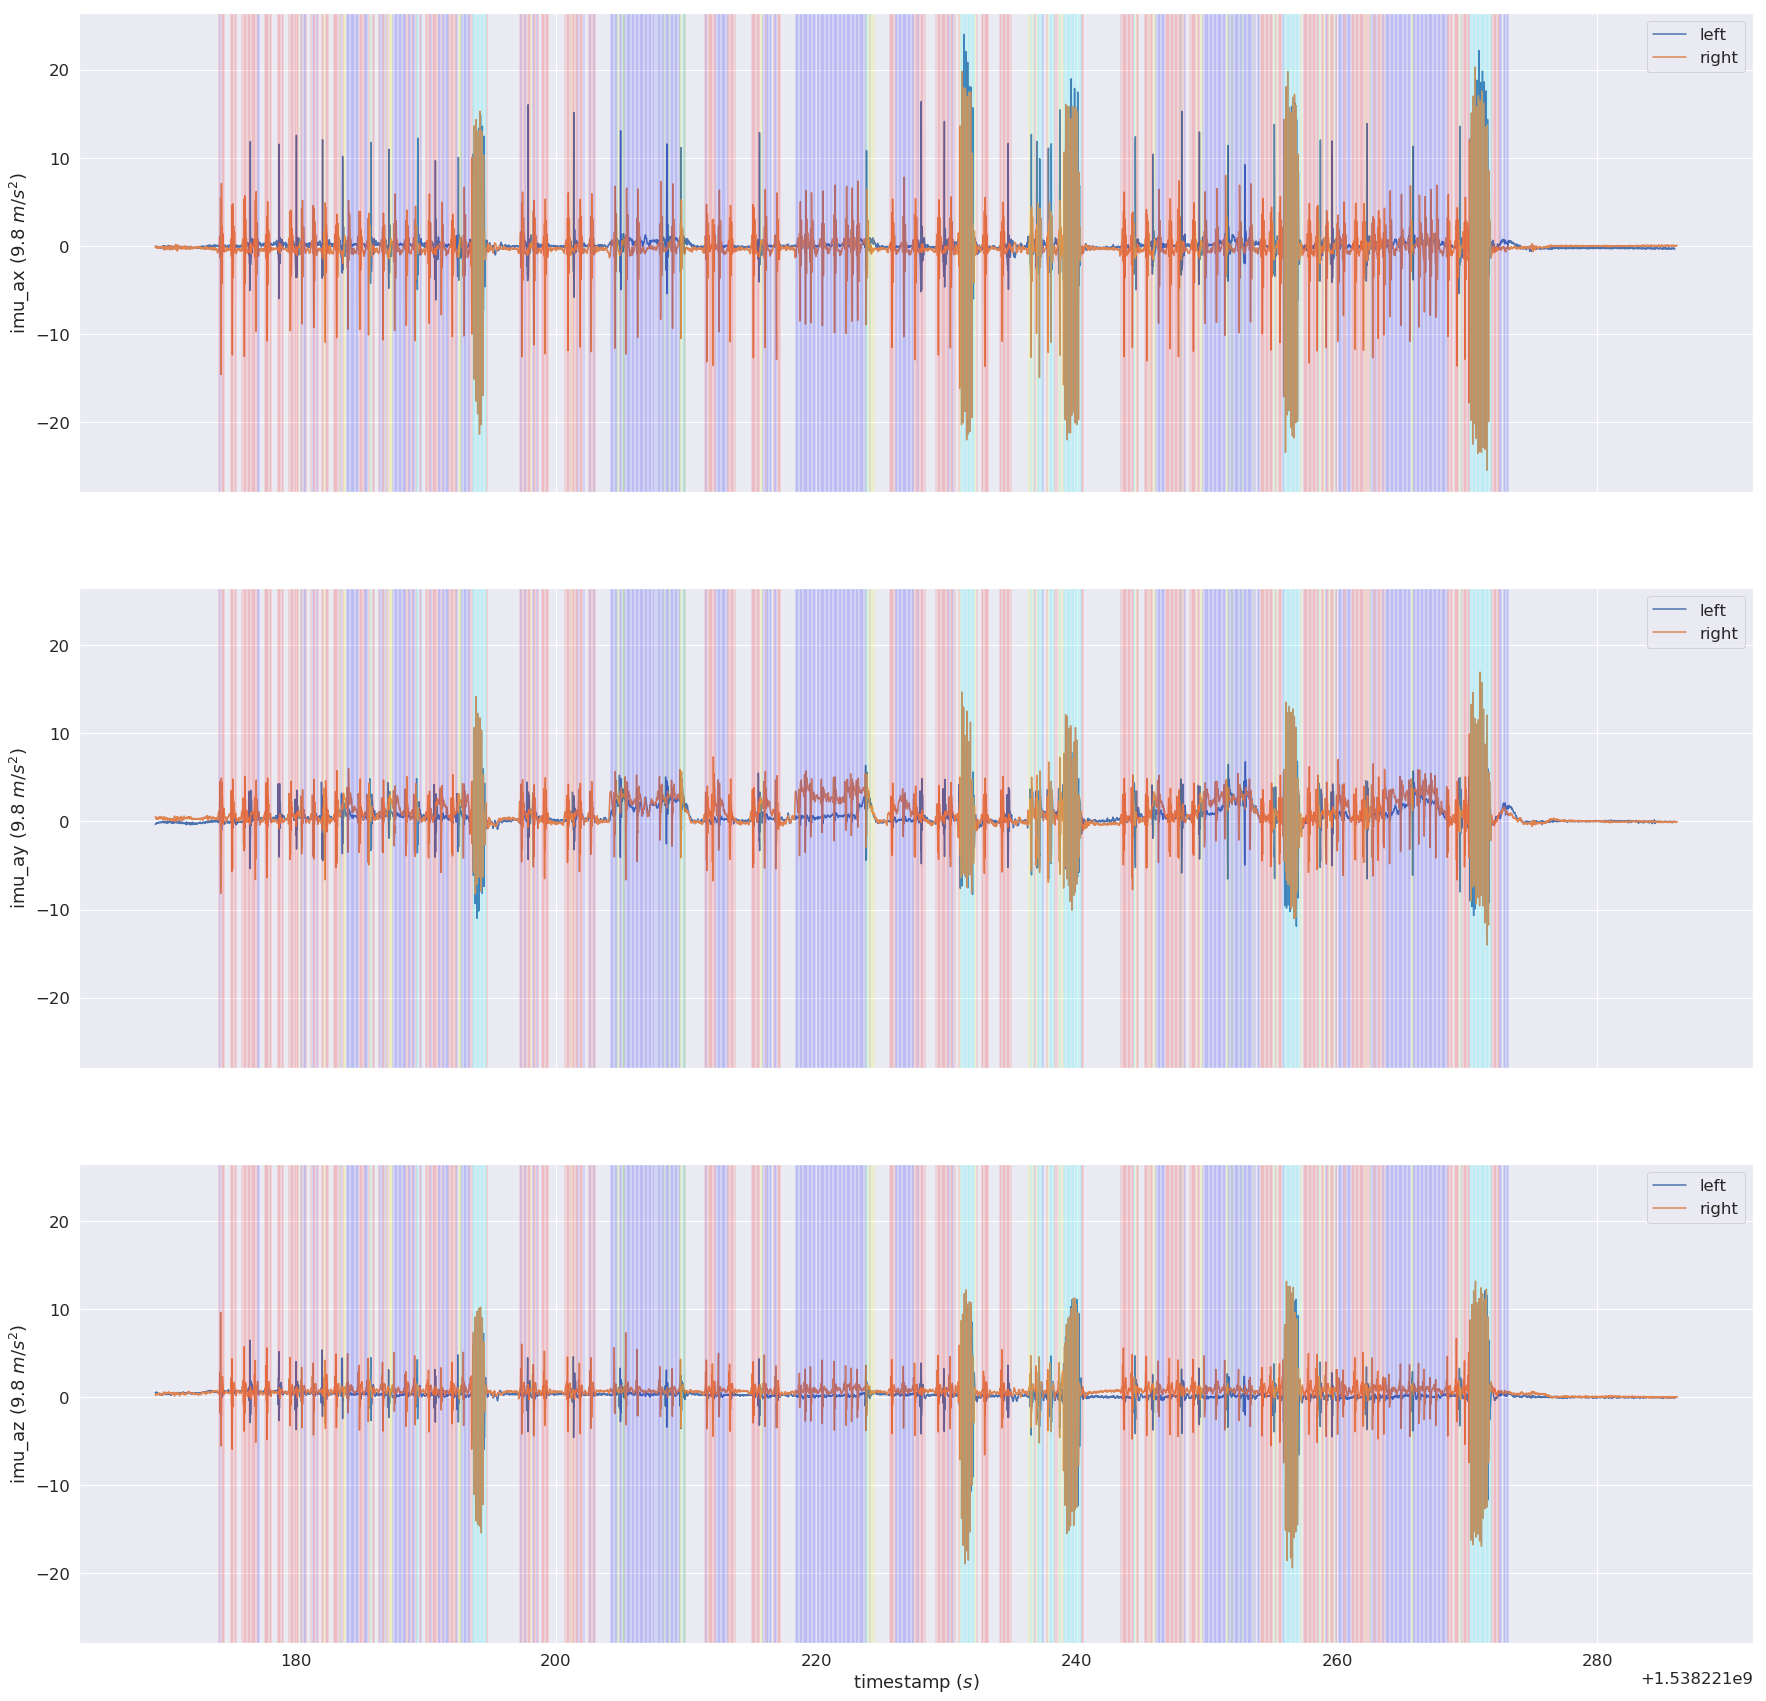

In [8]:
show_cols = tk.ZERO_ADJ_COL[:3]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
start_time = pred_df['timestamp'].iloc[0]
end_time = pred_df['timestamp'].iloc[-1]

left_df = play.play_dict['L']
left_df = left_df[(left_df['timestamp'] >= start_time) & (left_df['timestamp'] <= end_time)]

right_df = play.play_dict['R']
right_df = right_df[(right_df['timestamp'] >= start_time) & (right_df['timestamp'] <= end_time)]

for i_, col in enumerate(show_cols):
    sns.lineplot(data=left_df, x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=right_df, x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col + ' $(9.8\ m/s^2)$')
    for row_ in pred_df.values:
        event_time = float(row_[0])
        hit_type = int(row_[1])
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()

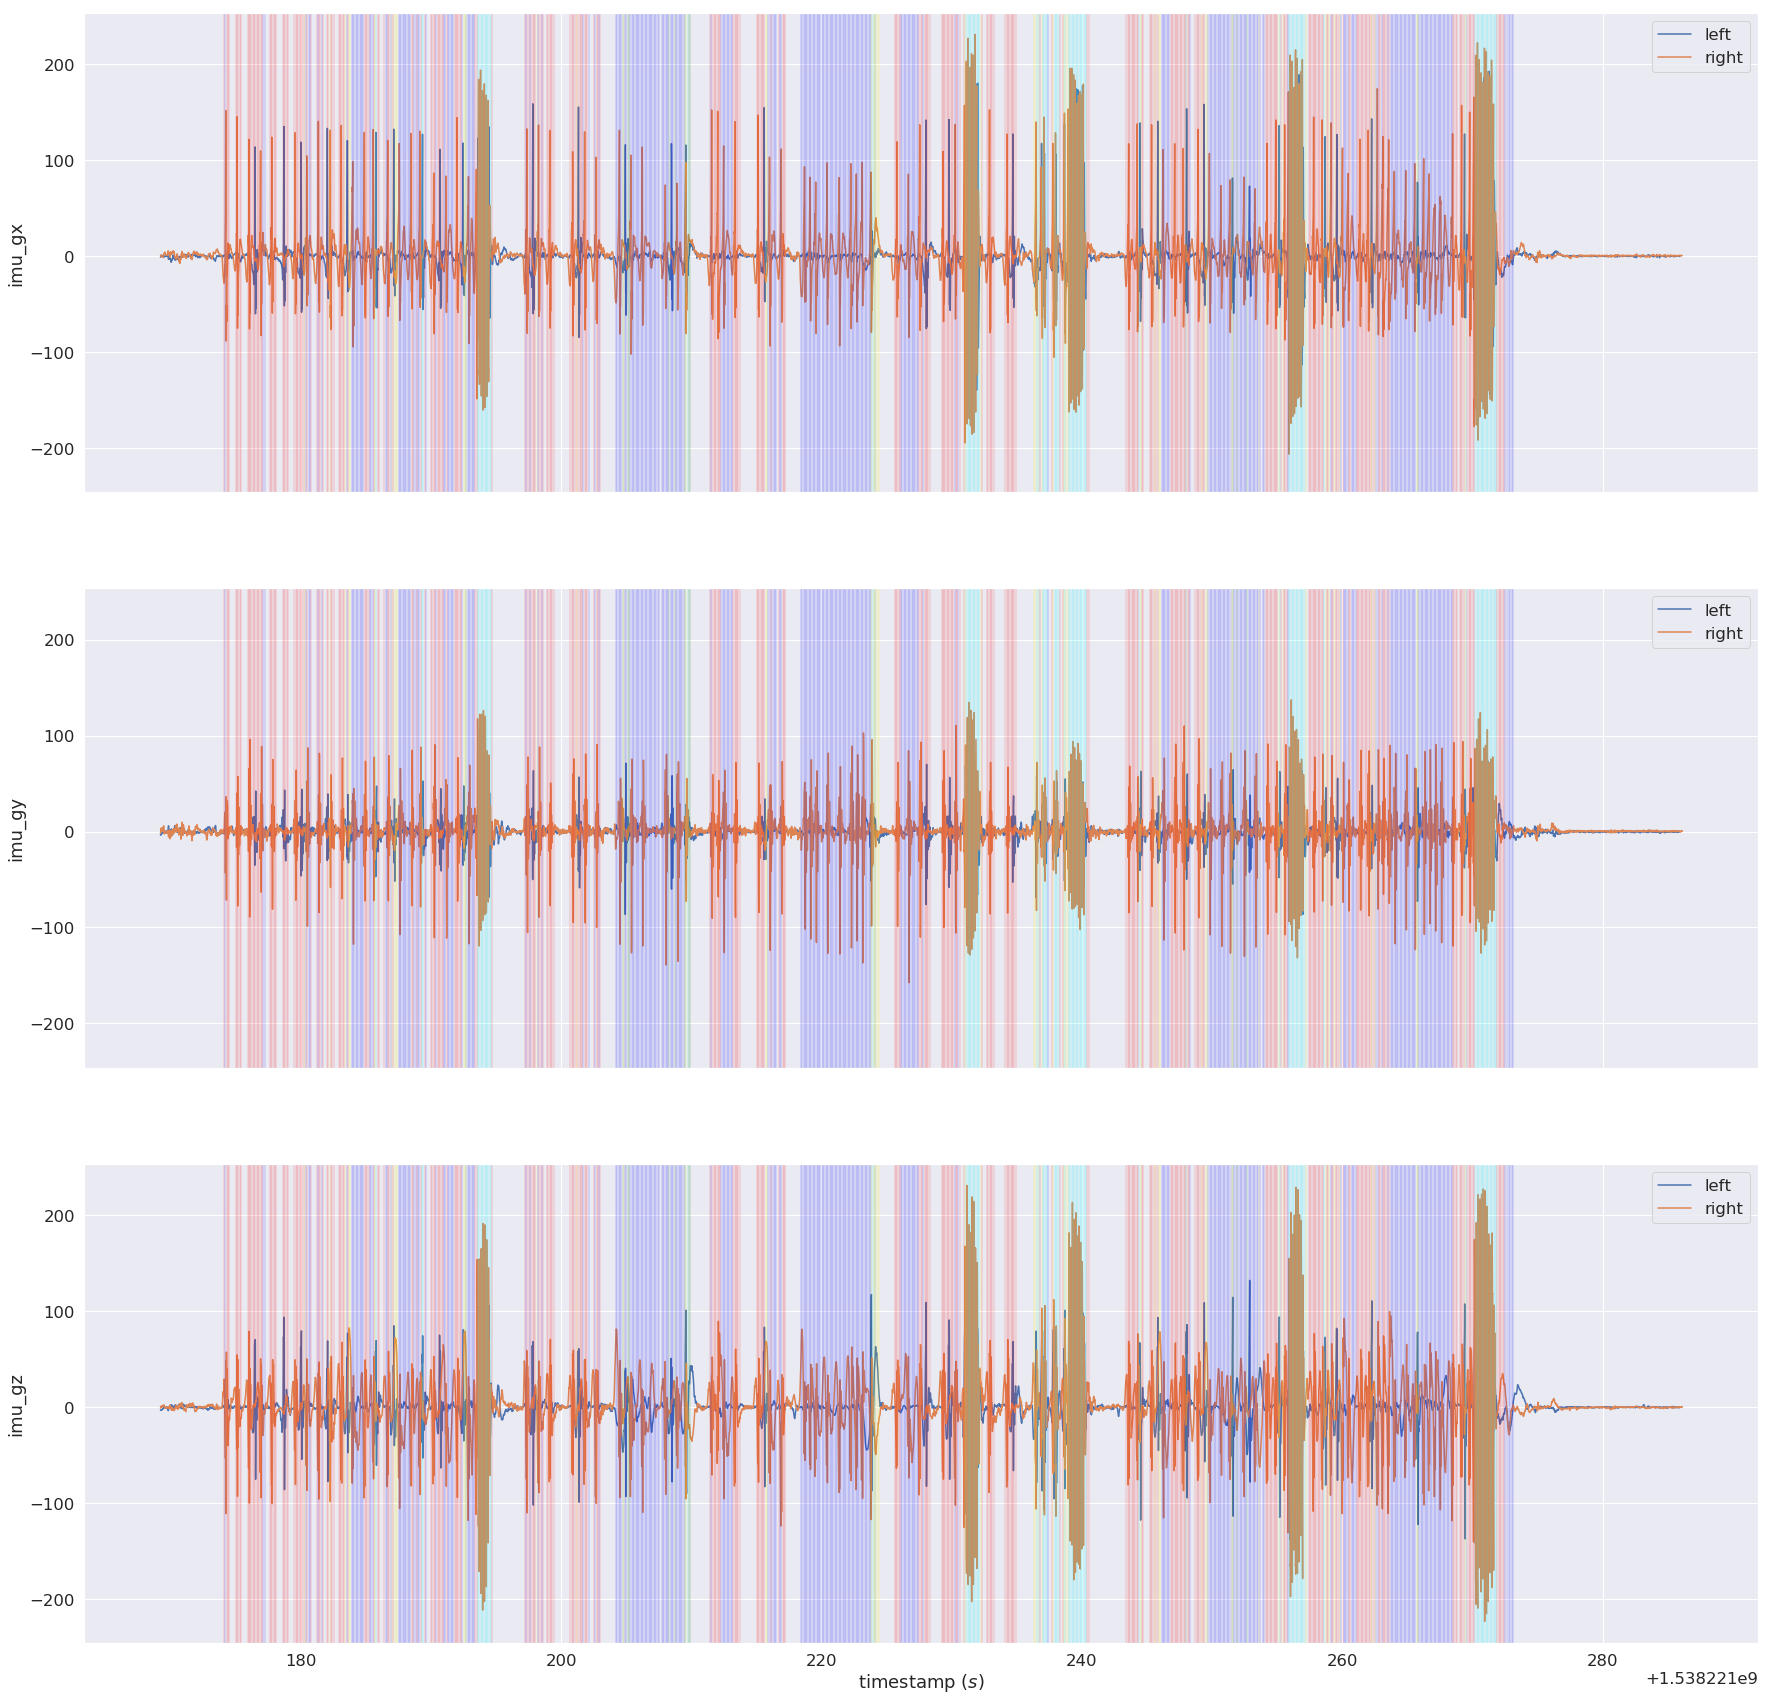

In [9]:
show_cols = tk.ZERO_ADJ_COL[3:6]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
start_time = pred_df['timestamp'].iloc[0]
end_time = pred_df['timestamp'].iloc[-1]

left_df = play.play_dict['L']
left_df = left_df[(left_df['timestamp'] >= start_time) & (left_df['timestamp'] <= end_time)]

right_df = play.play_dict['R']
right_df = right_df[(right_df['timestamp'] >= start_time) & (right_df['timestamp'] <= end_time)]

for i_, col in enumerate(show_cols):
    sns.lineplot(data=left_df, x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=right_df, x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col)
    for row_ in pred_df.values:
        event_time = float(row_[0])
        hit_type = int(row_[1])
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()